# 🎓 ML Practice Exam - โจทย์ฝึกหัด
โจทย์สอบฝึกหัด Introduction to ML and Deep Learning

**เวลาทำข้อสอบ:** 90 นาที  
**คะแนนเต็ม:** 100 คะแนน

---

## 📌 โครงสร้างข้อสอบ
- **Part 1:** Regression (50 คะแนน) - ทำนายเงินเดือนพนักงาน
- **Part 2:** Classification (50 คะแนน) - ทำนายโรคหัวใจ

---

## ⚠️ คำแนะนำ
1. อ่านโจทย์ให้ละเอียด
2. ใช้ชื่อตัวแปรที่เข้าใจง่าย
3. Comment โค้ดที่สำคัญ
4. แสดง metrics ที่โจทย์ต้องการ
5. ห้ามเทรนโมเดลใหม่เมื่อต้องการ predict ข้อมูลใหม่!

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

---
# Part 1: Regression - ทำนายเงินเดือนพนักงาน (50 คะแนน)

## 📊 Dataset: Employee Salary
บริษัทแห่งหนึ่งต้องการทำนายเงินเดือนของพนักงานใหม่ โดยมีข้อมูลดังนี้:

- **YearsExperience**: ประสบการณ์ทำงาน (ปี)
- **EducationLevel**: ระดับการศึกษา (1=ปริญญาตรี, 2=ปริญญาโท, 3=ปริญญาเอก)
- **PerformanceScore**: คะแนนประเมินผลงาน (0-100)
- **Salary**: เงินเดือน (บาท) - **Target Variable**

In [3]:
# Dataset
data_salary = {
    'YearsExperience': [1.5, 3.0, 5.0, 7.5, 2.0, 4.5, 6.0, 8.0, 10.0, 3.5],
    'EducationLevel': [1, 1, 2, 2, 1, 2, 3, 2, 3, 1],
    'PerformanceScore': [65, 70, 85, 90, 60, 75, 95, 88, 92, 72],
    'Salary': [25000, 35000, 55000, 75000, 28000, 48000, 85000, 70000, 95000, 38000]
}

df_salary = pd.DataFrame(data_salary)
print("Employee Salary Dataset:")
print(df_salary)
print(f"\nDataset shape: {df_salary.shape}")

Employee Salary Dataset:
   YearsExperience  EducationLevel  PerformanceScore  Salary
0              1.5               1                65   25000
1              3.0               1                70   35000
2              5.0               2                85   55000
3              7.5               2                90   75000
4              2.0               1                60   28000
5              4.5               2                75   48000
6              6.0               3                95   85000
7              8.0               2                88   70000
8             10.0               3                92   95000
9              3.5               1                72   38000

Dataset shape: (10, 4)


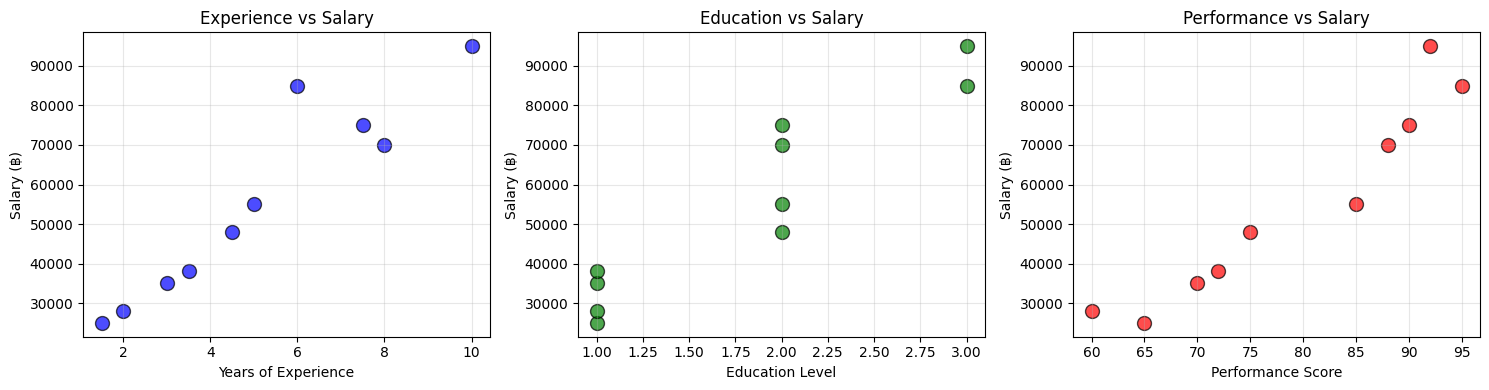

In [4]:
# Visualize data
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(df_salary['YearsExperience'], df_salary['Salary'], color='blue', s=100, edgecolors='black', alpha=0.7)
axes[0].set_xlabel('Years of Experience')
axes[0].set_ylabel('Salary (฿)')
axes[0].set_title('Experience vs Salary')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df_salary['EducationLevel'], df_salary['Salary'], color='green', s=100, edgecolors='black', alpha=0.7)
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Salary (฿)')
axes[1].set_title('Education vs Salary')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(df_salary['PerformanceScore'], df_salary['Salary'], color='red', s=100, edgecolors='black', alpha=0.7)
axes[2].set_xlabel('Performance Score')
axes[2].set_ylabel('Salary (฿)')
axes[2].set_title('Performance vs Salary')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## ❓ Part 1.1: สร้างและประเมินโมเดล (30 คะแนน)

**โจทย์:**
1. แบ่งข้อมูลเป็น Features (X) และ Target (y)
2. สร้าง **Multiple Polynomial Regression** model (degree=2)
3. เทรนโมเดลด้วยข้อมูลทั้งหมด (เนื่องจากข้อมูลน้อย)
4. ประเมินผลโมเดลด้วย:
   - R² Score
   - RMSE (Root Mean Squared Error)
   - MAE (Mean Absolute Error)
5. แสดงตารางเปรียบเทียบ Actual vs Predicted salary

**หมายเหตุ:** 
- ใช้ทั้ง 3 features: YearsExperience, EducationLevel, PerformanceScore
- Polynomial degree = 2
- ไม่ต้องใช้ StandardScaler

In [5]:
# TODO: เขียนโค้ดตรงนี้
# 1. แบ่ง X และ y
X = df_salary[['YearsExperience', 'EducationLevel', 'PerformanceScore']]
y = df_salary['Salary']

# 2. สร้าง Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 3. Train โมเดล
model = LinearRegression()
model.fit(X_poly, y)

# 4. Predict และคำนวณ metrics
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# 5. แสดงผลลัพธ์
print("\nPolynomial Regression Model Performance:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


Polynomial Regression Model Performance:
R²: 1.0000
MSE: 0.00
MAE: 0.00


## ❓ Part 1.2: ทำนายเงินเดือนพนักงานใหม่ (20 คะแนน)

**โจทย์:**  
บริษัทจะรับพนักงานใหม่ที่มีคุณสมบัติดังนี้:
- **YearsExperience:** 6.5 ปี
- **EducationLevel:** 2 (ปริญญาโท)
- **PerformanceScore:** 82 คะแนน

**ให้:**
1. ใช้โมเดลจาก Part 1.1 ทำนายเงินเดือนของพนักงานคนนี้
2. แสดงผลลัพธ์เป็น "Predicted Salary: ฿XX,XXX"

**⚠️ คำเตือน:**
- ห้ามเทรนโมเดลใหม่!
- ต้อง transform ข้อมูลใหม่ด้วย poly object เดิม

In [7]:
# TODO: เขียนโค้ดตรงนี้
# 1. สร้างข้อมูลพนักงานใหม่
new = pd.DataFrame({
    'YearsExperience': [6.5],
    'EducationLevel': [2],
    'PerformanceScore': [82]
})

# 2. Transform ด้วย poly object เดิม
new_poly = poly.transform(new)

# 3. Predict ด้วยโมเดลเดิม
new_pred = model.predict(new_poly)

# 4. แสดงผลลัพธ์
print(f"\nPredicted Salary for new employee: {new_pred[0]:.2f} ฿")



Predicted Salary for new employee: 60415.90 ฿


---
# Part 2: Classification - ทำนายโรคหัวใจ (50 คะแนน)

## 📊 Dataset: Heart Disease
โรงพยาบาลต้องการระบบช่วยวินิจฉัยโรคหัวใจเบื้องต้น โดยมีข้อมูลผู้ป่วย:

- **Age**: อายุ (ปี)
- **Sex**: เพศ (0=หญิง, 1=ชาย)
- **ChestPain**: ระดับอาการเจ็บหน้าอก (0-3)
- **RestingBP**: ความดันโลหิต (mmHg)
- **Cholesterol**: คอเลสเตอรอล (mg/dl)
- **FastingBS**: น้ำตาลในเลือดขณะอดอาหาร (0=ปกติ, 1=สูง)
- **MaxHR**: อัตราการเต้นหัวใจสูงสุด (bpm)
- **HeartDisease**: มีโรคหัวใจหรือไม่ (0=ไม่มี, 1=มี) - **Target Variable**

In [8]:
# Dataset
np.random.seed(42)

data_heart = {
    'Age': [45, 52, 38, 67, 55, 41, 59, 48, 62, 50, 44, 58, 39, 65, 47, 53, 42, 60, 49, 56],
    'Sex': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    'ChestPain': [0, 2, 1, 3, 1, 0, 2, 1, 3, 0, 2, 3, 0, 3, 1, 2, 0, 3, 2, 1],
    'RestingBP': [120, 140, 110, 150, 130, 115, 145, 125, 155, 120, 135, 148, 118, 160, 122, 142, 112, 152, 138, 128],
    'Cholesterol': [200, 240, 180, 280, 220, 190, 260, 210, 290, 195, 230, 270, 185, 300, 205, 250, 175, 285, 245, 215],
    'FastingBS': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    'MaxHR': [170, 140, 180, 120, 160, 175, 130, 165, 115, 172, 145, 125, 178, 110, 168, 135, 182, 118, 142, 155],
    'HeartDisease': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
}

df_heart = pd.DataFrame(data_heart)
print("Heart Disease Dataset:")
print(df_heart.head(10))
print(f"\nDataset shape: {df_heart.shape}")
print(f"\nTarget distribution:")
print(df_heart['HeartDisease'].value_counts())

Heart Disease Dataset:
   Age  Sex  ChestPain  RestingBP  Cholesterol  FastingBS  MaxHR  HeartDisease
0   45    1          0        120          200          0    170             0
1   52    1          2        140          240          1    140             1
2   38    0          1        110          180          0    180             0
3   67    1          3        150          280          1    120             1
4   55    0          1        130          220          0    160             0
5   41    1          0        115          190          0    175             0
6   59    1          2        145          260          1    130             1
7   48    0          1        125          210          0    165             0
8   62    1          3        155          290          1    115             1
9   50    0          0        120          195          0    172             0

Dataset shape: (20, 8)

Target distribution:
HeartDisease
0    10
1    10
Name: count, dtype: int64


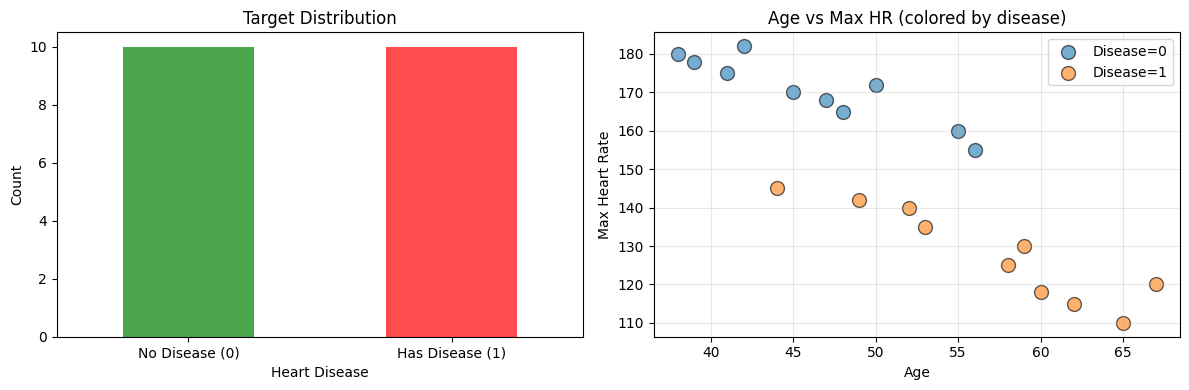

In [9]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_heart['HeartDisease'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Count')
axes[0].set_title('Target Distribution')
axes[0].set_xticklabels(['No Disease (0)', 'Has Disease (1)'], rotation=0)

# Age vs Heart Disease
for disease in [0, 1]:
    subset = df_heart[df_heart['HeartDisease'] == disease]
    axes[1].scatter(subset['Age'], subset['MaxHR'], 
                   label=f"Disease={disease}", s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Max Heart Rate')
axes[1].set_title('Age vs Max HR (colored by disease)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## ❓ Part 2.1: เปรียบเทียบโมเดล Classification (30 คะแนน)

**โจทย์:**
1. แบ่งข้อมูลเป็น Features (X) และ Target (y)
2. แบ่ง train-test split (test_size=0.2, random_state=42)
3. ทำ StandardScaler ให้กับ X_train และ X_test
4. สร้างและเปรียบเทียบ **3 โมเดล**:
   - **Logistic Regression** (max_iter=1000)
   - **Random Forest** (n_estimators=100, random_state=42)
   - **Support Vector Machine (SVM)** (kernel='rbf', random_state=42)
5. แสดงผล Accuracy ของแต่ละโมเดล
6. เลือกโมเดลที่ดีที่สุด (accuracy สูงสุด) และแสดง:
   - Classification Report
   - Confusion Matrix

**หมายเหตุ:**
- ใช้ทุก features (Age, Sex, ChestPain, RestingBP, Cholesterol, FastingBS, MaxHR)
- ต้อง fit scaler กับ train เท่านั้น แล้ว transform ทั้ง train และ test

In [11]:
# TODO: เขียนโค้ดตรงนี้
# 1. แบ่ง X และ y
X = df_heart.drop('HeartDisease', axis=1)
y = df_heart['HeartDisease']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. สร้าง 3 โมเดล
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# 5. เทรนและประเมินผล
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# 6. แสดงผล Classification Report และ Confusion Matrix ของโมเดลที่ดีที่สุด
best_model = max(models, key=lambda x: f1_score(y_test, models[x].predict(X_test)))
print(f"\nBest Model: {best_model}")
print(classification_report(y_test, models[best_model].predict(X_test)))
print(confusion_matrix(y_test, models[best_model].predict(X_test)))


Logistic Regression Performance:
Accuracy: 1.0000
F1 Score: 1.0000

Random Forest Performance:
Accuracy: 1.0000
F1 Score: 1.0000

SVM Performance:
Accuracy: 1.0000
F1 Score: 1.0000

Best Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[1 0]
 [0 3]]


## ❓ Part 2.2: ทำนายผู้ป่วยรายใหม่ (20 คะแนน)

**โจทย์:**  
มีผู้ป่วยรายใหม่มาตรวจที่โรงพยาบาล มีข้อมูลดังนี้:

- **Age:** 54 ปี
- **Sex:** 1 (ชาย)
- **ChestPain:** 2 (ปานกลาง)
- **RestingBP:** 145 mmHg
- **Cholesterol:** 265 mg/dl
- **FastingBS:** 1 (สูง)
- **MaxHR:** 138 bpm

**ให้:**
1. ใช้โมเดลที่ดีที่สุดจาก Part 2.1 ทำนายว่าผู้ป่วยคนนี้มีโรคหัวใจหรือไม่
2. แสดง:
   - Predicted class (0 หรือ 1)
   - Probability ของแต่ละ class
   - คำอธิบายผล ("No heart disease" หรือ "Has heart disease")

**⚠️ คำเตือน:**
- ห้ามเทรนโมเดลใหม่!
- ต้อง transform ข้อมูลใหม่ด้วย scaler object เดิม
- ลำดับ features ต้องถูกต้อง: [Age, Sex, ChestPain, RestingBP, Cholesterol, FastingBS, MaxHR]

In [12]:
# TODO: เขียนโค้ดตรงนี้
# 1. สร้างข้อมูลผู้ป่วยใหม่
new = pd.DataFrame({
    'Age': [54],
    'Sex': [1],
    'ChestPain': [2],
    'RestingBP': [145],
    'Cholesterol': [265],
    'FastingBS': [1],
    'MaxHR': [138]
})

# 2. Transform ด้วย scaler object เดิม
new_scaled = scaler.transform(new)


# 3. Predict ด้วยโมเดลที่ดีที่สุด
best_model = max(models, key=lambda x: f1_score(y_test, models[x].predict(X_test)))
prediction = models[best_model].predict(new_scaled)
print(f"Prediction for new patient data using {best_model}: {prediction}")

# 4. แสดงผลลัพธ์
print(f"The patient is predicted to {'have' if prediction[0] == 1 else 'not have'} heart disease.")

Prediction for new patient data using Logistic Regression: [1]
The patient is predicted to have heart disease.


---
## 📝 สรุปเกณฑ์การให้คะแนน

### Part 1: Regression (50 คะแนน)
- **1.1 สร้างและประเมินโมเดล (30 คะแนน)**
  - แบ่ง X, y ถูกต้อง: 5 คะแนน
  - สร้าง Polynomial Features ถูกต้อง: 10 คะแนน
  - Train โมเดลและ predict: 5 คะแนน
  - คำนวณ metrics (R², RMSE, MAE): 10 คะแนน

- **1.2 ทำนายข้อมูลใหม่ (20 คะแนน)**
  - เตรียมข้อมูลใหม่ถูกต้อง: 5 คะแนน
  - Transform ด้วย poly.transform() (ไม่ใช่ fit_transform): 10 คะแนน
  - Predict ด้วยโมเดลเดิม (ไม่เทรนใหม่): 5 คะแนน

### Part 2: Classification (50 คะแนน)
- **2.1 เปรียบเทียบโมเดล (30 คะแนน)**
  - แบ่ง train-test และ scale ถูกต้อง: 10 คะแนน
  - สร้างและเทรน 3 โมเดล: 10 คะแนน
  - แสดง metrics และเลือกโมเดลที่ดีที่สุด: 10 คะแนน

- **2.2 ทำนายข้อมูลใหม่ (20 คะแนน)**
  - เตรียมข้อมูลใหม่ถูกต้อง: 5 คะแนน
  - Transform ด้วย scaler.transform() (ไม่ใช่ fit_transform): 10 คะแนน
  - Predict และแสดงผลครบถ้วน: 5 คะแนน

---

## ✅ Checklist ก่อนส่งงาน
- [ ] Part 1.1: โมเดล Polynomial Regression ทำงานได้และแสดง metrics ครบ
- [ ] Part 1.2: ทำนายข้อมูลใหม่ได้โดยไม่เทรนโมเดลใหม่
- [ ] Part 2.1: เปรียบเทียบ 3 โมเดลและแสดง Classification Report
- [ ] Part 2.2: ทำนายผู้ป่วยใหม่และแสดง probability
- [ ] ไม่มี error ตอน run code
- [ ] Comment อธิบายโค้ดที่สำคัญ

---

## 🎯 เคล็ดลับการทำข้อสอบ
1. **อ่านโจทย์ทั้งหมดก่อน** - วางแผนเวลา
2. **ทำข้อที่ถนัดก่อน** - สะสมคะแนน
3. **ตรวจสอบ shape** - ใช้ .shape เช็คว่า transform ถูกต้อง
4. **จำกฎสำคัญ:**
   - fit_transform → ใช้กับ train เท่านั้น
   - transform → ใช้กับ test/new data
   - ห้ามเทรนโมเดลใหม่เมื่อ predict ข้อมูลใหม่!
5. **Debug ง่ายๆ** - ใช้ print() เช็คค่าระหว่างทาง

---

**Good luck! 🍀**